## Анализ датасета [UFO Sightings](https://www.kaggle.com/NUFORC/ufo-sightings)

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
ufo_data = pd.read_csv('./scrubbed.csv', escapechar='`', low_memory=False)

Проверка основных атрибутов данных

In [74]:
ufo_data.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [75]:
ufo_data.shape

(80332, 11)

In [72]:
ufo_data.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [76]:
nulvals = ufo_data.isnull().sum()
nulpct = (nulvals / len(ufo_data))*100
print(' Null Values (% of entries):')
print(round(nulpct.sort_values(ascending=False),2))

 Null Values (% of entries):
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
longitude                0.01
datetime                 0.00
city                     0.00
duration (seconds)       0.00
duration (hours/min)     0.00
date posted              0.00
latitude                 0.00
dtype: float64


### Первичная обработка данных

Чистка данных, чтобы получить значимые визуализации. 
Детализация строк NaN и нерелевантных столбцов необходима для того, чтобы анализ данных был простым и сфокусированным.

In [78]:
# очистка датасета от Null значений
ufo_data = pd.read_csv('./scrubbed.csv', 
                        low_memory = False, 
                        na_values = ['UNKNOWN','UNK'], 
                        na_filter = True, 
                        skip_blank_lines = True)

# столбцы, которые понадобятся для ответа на поставленные вопросы
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

# создание датафрейма для работы
ufo_data = pd.DataFrame(data=ufo_data, columns=ufo_subcols)

# удаление null значений
ufo_data = ufo_data.dropna(thresh=8)

# сборс индексов
ufo_data = ufo_data.reset_index(drop=True)

# перевод широты и долготы в числовые значения
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'],errors = 'coerce')
ufo_data['longitude '] = pd.to_numeric(ufo_data['longitude '], errors='coerce')

# перевод времени и даты в приемлемый формат
ufo_date = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')

ufo_data['datetime'] = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')

In [79]:
ufo_data.shape

(80257, 10)

Датасет содержит уникальные записи о наблюдениях НЛО за период 1949-2014.

Можно посмотреть, в какие года было наибольшее количество сообщений о наблюдении НЛО

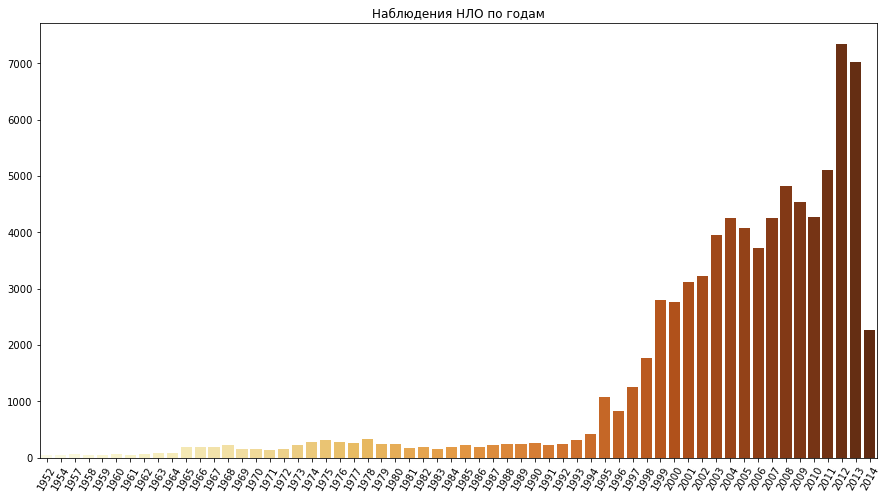

In [93]:
ufo_yr = ufo_date.dt.year  # series только с годами

## задание осей ##
years_data = ufo_yr.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data.to_list()

## создание графика ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Наблюдения НЛО по годам')

years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "YlOrBr")

### Вопросы, которые можно поставить к датасету

Общие вопросы по категориям, ответы на которые можно найти в данных:
1. География - Где чаще всего наблюдали НЛО?
2. Сезонность - В какой период в течение года чаще всего были наблюдения?
3. Согласованность - Есть ли часто используемые описания в разделе "формы"?
4. Вероятность - Статистически, где и когда я с наибольшей вероятностью увижу НЛО? Как это должно выглядеть?


### География - Где чаще всего наблюдали НЛО?

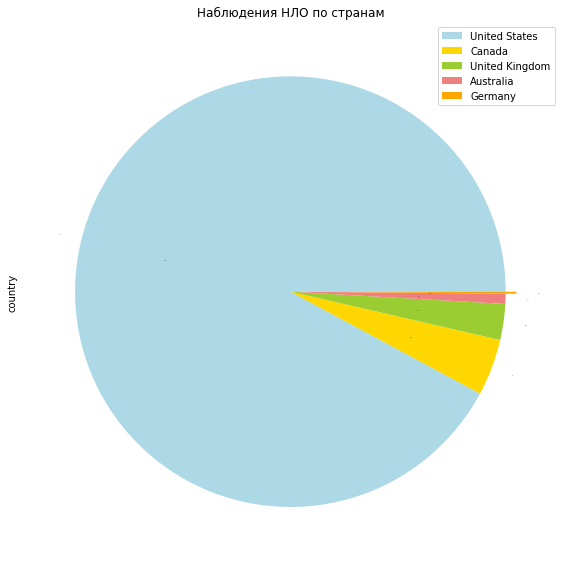

In [97]:
country_sightings = ufo_data.country.value_counts()  # num ufo sightings per country 

explode = (0, 0, 0, 0., 0.05)
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
country_sightings.plot(kind = 'pie', fontsize = 0, title='Наблюдения НЛО по странам', colors=colors,
                       autopct='%1.1f%%',shadow=False, explode=explode,figsize=(8,8))
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="best")
plt.tight_layout()

Так как данные из США составляют подавляющую часть набора и есть указание штатов, стоит переформулировать вопрос и искать ответ на:
    
    Где в США чаще наблюдали НЛО?

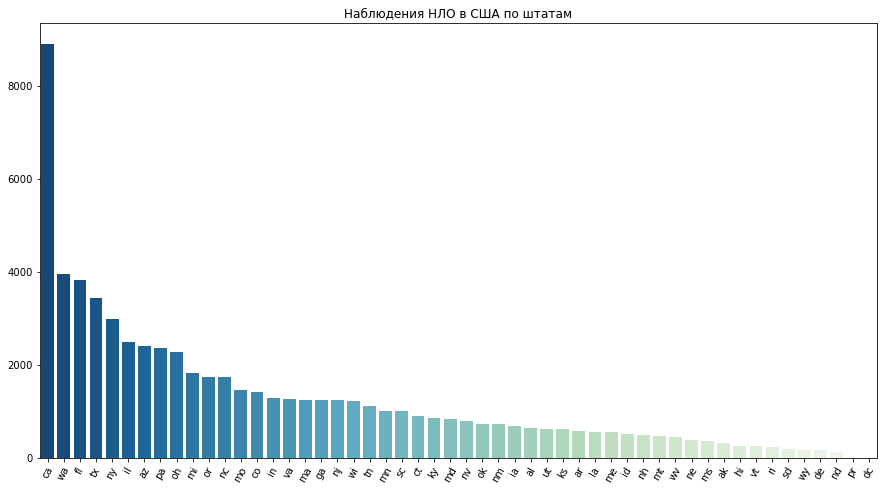

Топ 10 Штатов по наблюдениям НЛО:
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64


In [102]:
# фильтрация значений только по США
usa_filter = ufo_data['country']=='us'
us_data = ufo_data[usa_filter]

states_sights = us_data.state.value_counts()
state_names = states_sights.index
state_freq = states_sights.to_list()

plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Наблюдения НЛО в США по штатам')
states_plot = sns.barplot(x=state_names,y=state_freq, palette="GnBu_r")
plt.show()
print('Топ 10 Штатов по наблюдениям НЛО:')
print(states_sights[:10].sort_values(ascending=False))

В топе присутствуют штаты Калифорния, Нью-Йорк и Техас, но их население весьма велико. Этот факт значительно влияет на вероятность наблюдения НЛО из расчета на отдельного человека.

Следует немного пойти в глубь и посмотреть на картину по распределению наблюдений НЛО на одного человека по каждому штату.

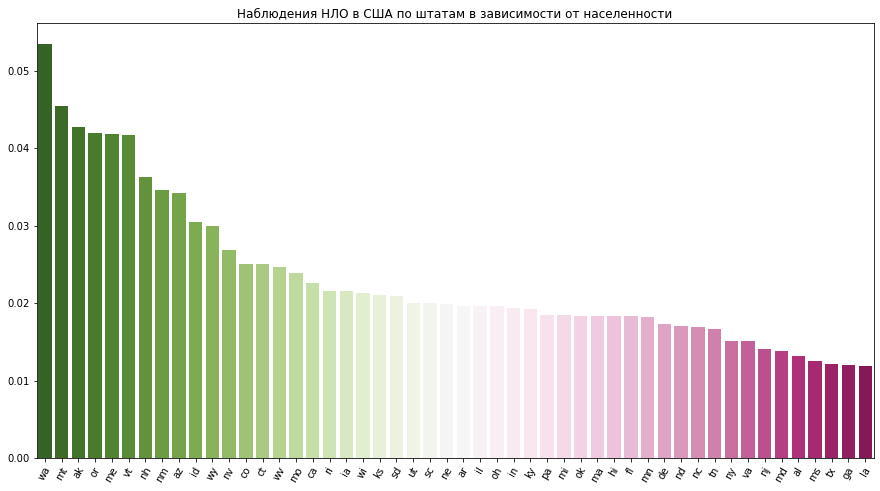

Топ 10 Штатов с наибольшей вероятностью наблюдения НЛО на человка:
wa    0.05
mt    0.05
ak    0.04
or    0.04
me    0.04
vt    0.04
nh    0.04
nm    0.03
az    0.03
id    0.03
dtype: float64


In [104]:
statespop = {'al':4872725.,'ak':746079.,'az':7044577.,'ar':2998643.,'ca':39506094.,
            'co':5632271.,'ct':3568174.,'de':960054.,'dc':691963.,'fl':20979964.,
            'ga':10421344.,'hi':1431957.,'id':1713452.,'il':12764031.,'in':6653338.,
            'ia':3147389.,'ks':2907857.,'ky':4449337.,'la':4694372.,'me':1333505.,
            'md':6037911.,'ma':6839318.,'mi':9938885.,'mn':5557469.,'ms':2988062.,
            'mo':6109796.,'mt':1052967.,'ne':1920467.,'nv':2996358,'nh':1339479.,
            'nj':8953517.,'nm':2081702.,'ny':19743395.,'nc':10258390.,'nd':759069.,
            'oh':11623656.,'ok':3939708.,'or':4162296.,'pa':12776550.,'pr':3661538.,
            'ri':1057245.,'sc':5027404.,'sd':872989.,'tn':6707332.,'tx':28295553.,
            'ut':3111802.,'vt':623100.,'va':8456029.,'wa':7415710.,'wv':1821151.,
            'wi':5789525.,'wy':584447.} 
states_pop = pd.Series(statespop)  # turn dict into series type


state_propsight = (states_sights / states_pop)*100 
state_propsight = state_propsight.sort_values(ascending=False) 

# Visualize it
us_namesp = state_propsight.index
us_sightsp = state_propsight.to_list()

plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
plt.title('Наблюдения НЛО в США по штатам в зависимости от населенности')
sns.barplot(x = us_namesp[:50], y = us_sightsp[:50], palette="PiYG_r")
plt.show()
print('Топ 10 Штатов с наибольшей вероятностью наблюдения НЛО на человка:')
print(round(state_propsight[:10],2))

По двум вариантам исследования штатs Вашингтон(2, 1) и Аризона(7, 9) являются местами с набольшей вероятностью наблюдения НЛО.

### Сезонность - В какой период в течение года чаще всего были наблюдения?

В какой период года вероятее всего наблюдение?

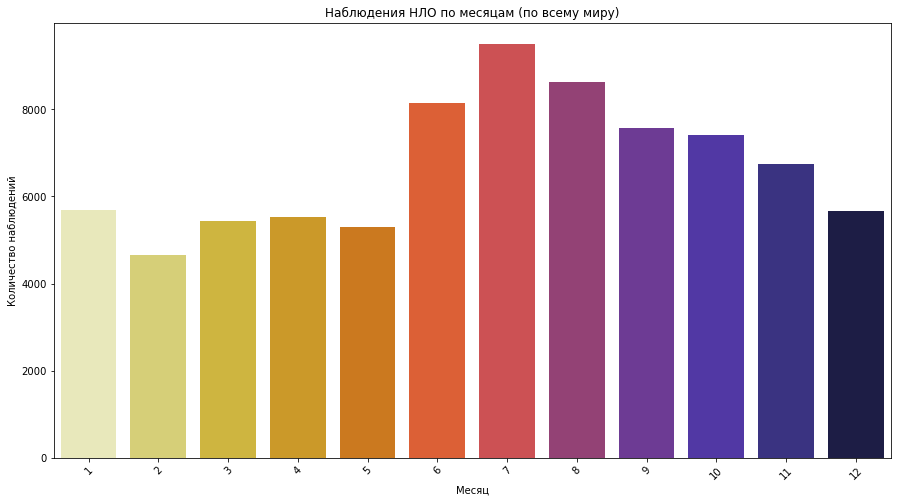

In [108]:
m_cts = (ufo_data['datetime'].dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.to_list()
f, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=m_ctsx, y=m_ctsy, palette="CMRmap_r")
ax.set_title('Наблюдения НЛО по месяцам (по всему миру)')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.show()

Так как Австралия - единственная страна из присутствующих в списке наблюдений и одна из последних по количеству записей, разделение на северное и южное полушарие имеет мало смысла. Наибольшее количество записей о наблюдениях НЛО приходятся на летние месяцы. На этот факт могут влиять различные факторы: сезон отпусков, более долгий световой день, более долгое нахождение на улице в связи с погодными условиями.

### Согласованность - Есть ли часто используемые описания в разделе "формы"?


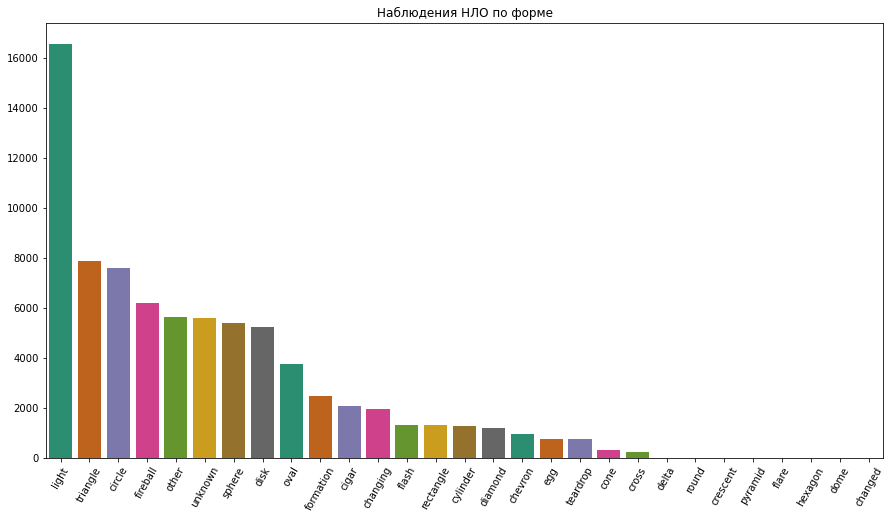

In [118]:
ufo_shape = ufo_data['shape']

## задание осей ##
shapes_data = ufo_shape.value_counts()
shapes_index = shapes_data.index
shapes_values = shapes_data.to_list()

## создание графика ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('Наблюдения НЛО по форме')

years_plot = sns.barplot(x=shapes_index[:60],y=shapes_values[:60], palette = "Dark2")

Самой наблюдаемой формой был просто свет (можно было перепутать и с другими явлениями - прирогдными/техногенными). Так же в топе находятся треугольник, круг, сфера, огненный шар, что также можно зачастую объяснить другими явлениями.

### Вероятность - Статистически, где и когда я с наибольшей вероятностью увижу НЛО? Как это должно выглядеть?

Исходя из проведенных выше исследований, для того чтобы наблюдать НЛО с наибольшей вероятностью стоит отправиться в США штат Вашингтон в июле, а наблюдать скорее всего придется свет.